# **Proyek Analisis Data: Air Quality Dataset**
*   **Nama: Masdarul Rizqi**
*   **Email: m.rizqi1221@gmail.com**
*   **ID Dicoding: masdarulrizqi**

## Menentukan Pertanyaan Bisnis
*   Pertanyaan 1: Bagaimana tren kualitas udara (PM2.5) dari tahun 2013 hingga 2017 di berbagai lokasi?
*   Pertanyaan 2: Apakah ada perbedaan kualitas udara antar lokasi di tahun tertentu?
*   Pertanyaan 3: Apakah ada hubungan antara kelembaban (humidity), Suhu dan kualitas udara (PM2.5)?

## **Import Semua Packages/Library yang Digunakan**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import glob

#### Gabungkan dataset

Pada tahap ini, dilakukan penggabungan 12 dataset, di mana setiap dataset mewakili 1 lokasi. Tujuan utamanya adalah agar hanya perlu memanggil satu dataset gabungan di akhir proses, sehingga lebih praktis untuk dianalisis. 

In [2]:
file_paths = glob.glob('data/PRSA_Data_*.csv')

# Membaca dan menggabungkan semua file CSV
df_combined = pd.concat([pd.read_csv(file) for file in file_paths], ignore_index=True)

# Menyimpan dataset gabungan ke dalam file CSV baru
df_combined.to_csv('data/PRSA_Data_Combined.csv', index=False)

## Data Wrangling

### Gathering Data

In [2]:
df = pd.read_csv('data/PRSA_Data_Combined.csv')
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### Assessing Data

1. Mengecek berbagai lokasi 

In [3]:
df['station'].unique()

array(['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan',
       'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan',
       'Wanliu', 'Wanshouxigong'], dtype=object)

2.  Mengecek tipe data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


3.  Mengecek Missing Value

In [5]:
df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

Dapat dilihat diatas, banyak missing value terdapat di atribut `PM.25`,`PM10`,`SO2`,`NO2`,`CO`,`O3`,`TEMP`,`PRES`,`DEWP`,`RAIN`,`wd`,`WSPM`.

4.  Mengecek total duplikat

In [6]:
print(f"Jumlah duplikasi data: {df.duplicated().sum()}")

Jumlah duplikasi data: 0


In [7]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


### Cleaning Data

Pada tahap ini, dilakukan penghapusan missing value. Sebelumnya, dilakukan pengecekan terhadap jumlah missing value, dan penghapusan dilakukan untuk memastikan data yang digunakan sudah bersih.

In [3]:
df.dropna(inplace=True)
df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Pada tahap ini, dipilih atribut-atribut yang relevan sesuai dengan kebutuhan dan pertanyaan yang telah disebutkan sebelumnya.

In [4]:
df = df[['year','month','day','PM2.5','TEMP','DEWP','station']]
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df = df.drop(['year', 'month', 'day'], axis=1)

Pada tahap ini, dilakukan penggantian nama atribut. Atribut `DEWP`, yang mungkin membingungkan bagi beberapa orang, diganti menjadi `Relative_Humidity` untuk memastikan pemahaman yang lebih baik mengenai fungsi atribut tersebut.

In [5]:
df = df.rename(columns={
    'DEWP' : 'Relative_Humidity'
})
df.head()

,PM2.5,TEMP,Relative_Humidity,station,date
0,4.0,-0.7,-18.8,Aotizhongxin,2013-03-01
1,8.0,-1.1,-18.2,Aotizhongxin,2013-03-01
2,7.0,-1.1,-18.2,Aotizhongxin,2013-03-01
3,6.0,-1.4,-19.4,Aotizhongxin,2013-03-01
4,3.0,-2.0,-19.5,Aotizhongxin,2013-03-01


## Exploratory Data Analysis (EDA)

In [6]:
df.groupby("date").mean(numeric_only=True)

,PM2.5,TEMP,Relative_Humidity
date,,,
2013-03-01,7.421277,1.288511,-20.060426
2013-03-02,32.780220,0.411355,-16.240659
2013-03-03,80.492806,5.179137,-12.286331
2013-03-04,22.234615,9.779231,-12.816923
2013-03-05,131.909465,6.860082,-7.820988
...,...,...,...
2017-02-24,24.489130,4.900725,-11.364130
2017-02-25,11.421986,6.972695,-10.569858
2017-02-26,27.634752,6.802837,-8.020567


In [8]:
df.groupby("station").mean(numeric_only=True)

,PM2.5,TEMP,Relative_Humidity
station,,,
Aotizhongxin,81.863630,13.775611,3.241106
Changping,70.312328,13.401677,1.135299
Dingling,66.512518,13.556274,1.403411
Dongsi,84.933156,13.623338,2.277794
Guanyuan,83.101051,13.707451,3.242758
Gucheng,83.865653,13.926933,2.632562
Huairou,70.285669,12.276487,2.064693
Nongzhanguan,84.720783,13.698473,2.521988
Shunyi,79.400725,12.787637,1.542873


## Visualization & Explanatory Analysis

### **1.    Bagaimana tren kualitas udara (PM2.5) dari tahun 2013 hingga 2017 di berbagai lokasi?**

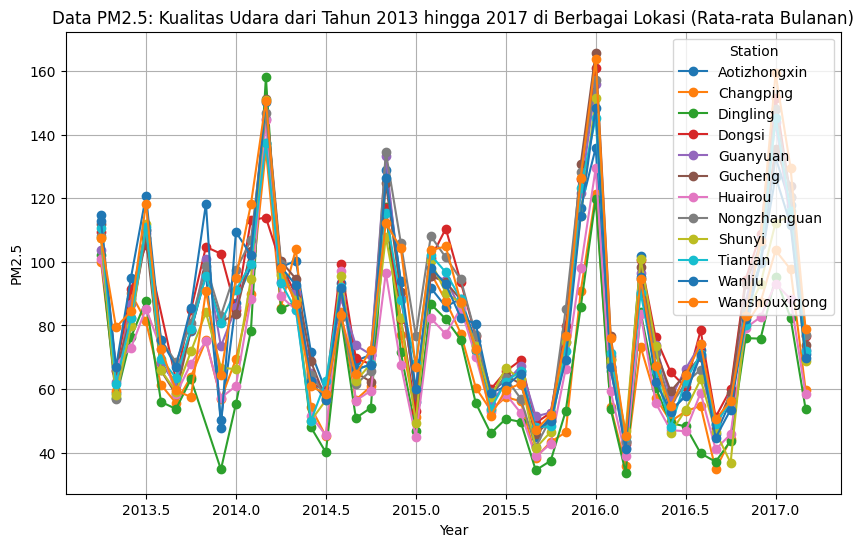

In [8]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Agregasi berdasarkan tahun, bulan, dan stasiun
df_monthly = df.groupby(['year', 'month', 'station']).mean().reset_index()

# Plot data rata-rata bulanan
plt.figure(figsize=(10, 6))
for station in df_monthly['station'].unique():
    station_data = df_monthly[df_monthly['station'] == station]
    plt.plot(station_data['year'] + station_data['month']/12, station_data['PM2.5'], marker='o', label=station)

plt.title('Data PM2.5: Kualitas Udara dari Tahun 2013 hingga 2017 di Berbagai Lokasi (Rata-rata Bulanan)')
plt.xlabel('Year')
plt.ylabel('PM2.5')
plt.legend(title='Station')
plt.grid(True)
plt.show()


Berdasarkan visualisasi kualitas udara (PM2.5) dari tahun 2013 hingga 2017 di berbagai lokasi, terlihat bahwa stasiun Wanshouxigong (ditandai dengan warna oranye) mendominasi dengan nilai PM2.5 yang sangat tinggi, mencapai lebih dari 160, menunjukkan kualitas udara yang buruk secara konsisten. Sementara itu, stasiun lain seperti Dongsi, Changping, dan Guanyuan mengalami fluktuasi moderat dengan tren kenaikan dan penurunan yang jelas antara 2014 hingga 2017. Secara keseluruhan, sebagian besar stasiun menunjukkan tren peningkatan PM2.5, meskipun ada beberapa yang mengalami penurunan kecil pada periode tertentu. Variasi musiman juga tampak, mengindikasikan pengaruh faktor lingkungan dan aktivitas manusia. Penelitian lebih lanjut diperlukan untuk memahami penyebab fluktuasi ini dan untuk mengembangkan kebijakan yang dapat mengurangi polusi udara di daerah yang paling terpengaruh.

### **2. Apakah ada perbedaan kualitas udara antar lokasi di tahun tertentu?**

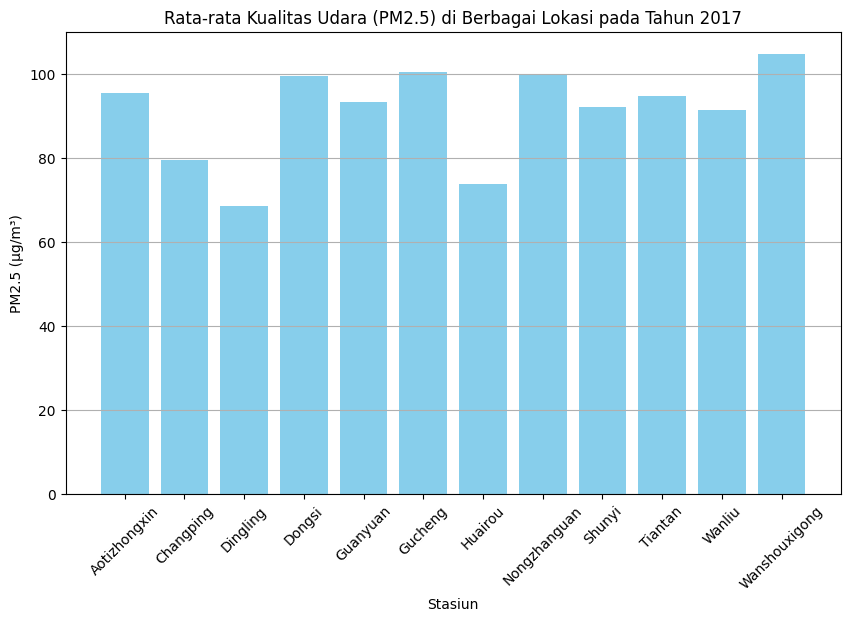

In [14]:
# Menghitung rata-rata PM2.5 untuk setiap stasiun untuk tahun 2017
average_pm25_2017 = df[df['year'] == 2017].groupby('station')['PM2.5'].mean().reset_index()

# Membuat bar chart untuk tahun 2017 menggunakan matplotlib
plt.figure(figsize=(10, 6))
plt.bar(average_pm25_2017['station'], average_pm25_2017['PM2.5'], color='skyblue')

# Menambahkan label dan judul
plt.title('Rata-rata Kualitas Udara (PM2.5) di Berbagai Lokasi pada Tahun 2017')
plt.xlabel('Stasiun')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(rotation=45)  # Memutar label sumbu x jika perlu
plt.grid(axis='y')

# Tampilkan visualisasi
plt.show()

Berdasarkan visualisasi tersebut, rata-rata kualitas udara ``(PM2.5)`` di berbagai lokasi pada tahun 2017 menunjukkan bahwa lokasi dengan tingkat polusi tertinggi adalah ``Wanshouxigong``, sementara lokasi dengan rata-rata kualitas udara terbaik ``(PM2.5 terendah)`` adalah ``Dingling``. Hal ini mengindikasikan bahwa ``Wanshouxigong`` memiliki masalah polusi udara yang lebih serius dibandingkan dengan lokasi lainnya, sedangkan kualitas udara di ``Dingling`` relatif lebih baik.

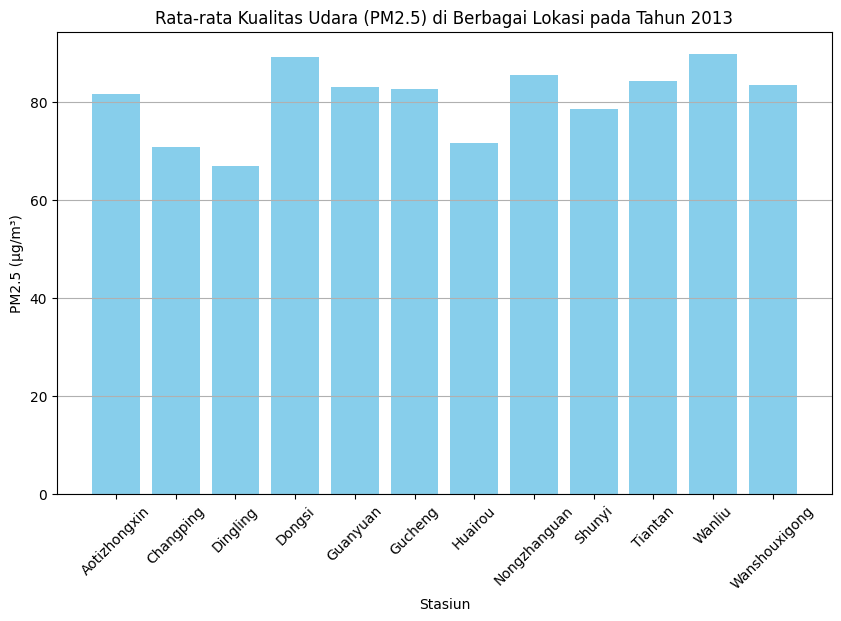

In [15]:
# Menghitung rata-rata PM2.5 untuk setiap stasiun untuk tahun 2017
average_pm25_2017 = df[df['year'] == 2013].groupby('station')['PM2.5'].mean().reset_index()

# Membuat bar chart untuk tahun 2017 menggunakan matplotlib
plt.figure(figsize=(10, 6))
plt.bar(average_pm25_2017['station'], average_pm25_2017['PM2.5'], color='skyblue')

# Menambahkan label dan judul
plt.title('Rata-rata Kualitas Udara (PM2.5) di Berbagai Lokasi pada Tahun 2013')
plt.xlabel('Stasiun')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(rotation=45)  # Memutar label sumbu x jika perlu
plt.grid(axis='y')

# Tampilkan visualisasi
plt.show()

Berdasarkan visualisasi tersebut, rata-rata kualitas udara ``(PM2.5)`` di berbagai lokasi pada tahun 2013 menunjukkan bahwa lokasi dengan tingkat polusi tertinggi adalah ``Wanliu``, sementara lokasi dengan rata-rata kualitas udara terbaik ``(PM2.5 terendah)`` adalah ``Dingling``. Hal ini mengindikasikan bahwa ``Wanliu`` memiliki masalah polusi udara yang lebih serius dibandingkan dengan lokasi lainnya, sedangkan kualitas udara di ``Dingling`` relatif lebih baik.

### **3.Apakah ada hubungan antara kelembaban (humidity), Suhu dan kualitas udara (PM2.5)?**

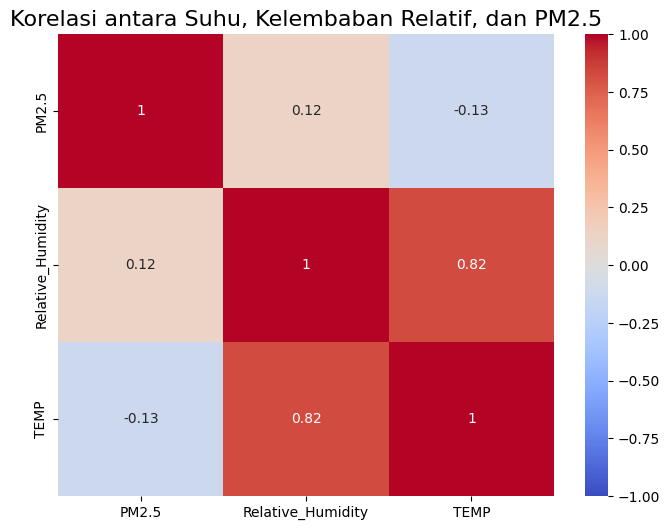

In [16]:
# Membuat heatmap dengan menambahkan atribut TEMP
plt.figure(figsize=(8, 6))
corr_all = df[['PM2.5', 'Relative_Humidity', 'TEMP']].corr()
sns.heatmap(corr_all, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Memberi judul dalam Bahasa Indonesia
plt.title('Korelasi antara Suhu, Kelembaban Relatif, dan PM2.5', fontsize=16)

plt.show()

Berdasarkan visualisasi korelasi yang ditunjukkan, hubungan antara kelembaban (``humidity``), suhu, dan kualitas udara (``PM2.5``) dapat dijawab sebagai berikut:
*   Kelembaban (``humidity``) dan ``PM2.5``: Ada korelasi positif yang sangat lemah (0.12) antara kelembaban relatif dan ``PM2.5``, yang menunjukkan bahwa peningkatan kelembaban relatif hanya sedikit terkait dengan peningkatan kadar ``PM2.5``. Namun, hubungan ini sangat lemah, sehingga tidak cukup signifikan untuk menunjukkan pengaruh kuat.
*   ``Suhu`` dan ``PM2.5``: Korelasi negatif yang sangat lemah (-0.13) antara suhu dan `PM2.5` menunjukkan bahwa ketika suhu meningkat, kadar ``PM2.5`` sedikit menurun. Namun, korelasinya juga sangat lemah, sehingga suhu tidak memiliki pengaruh yang signifikan terhadap ``PM2.5`` dalam konteks ini.
*   Suhu dan Kelembaban: Keduanya memiliki korelasi positif yang kuat (0.82), yang menunjukkan hubungan erat antara suhu yang lebih tinggi dan peningkatan kelembaban relatif.

## Conclusion

- Conclution pertanyaan 1 :<br>
Berdasarkan tren kualitas udara ``(PM2.5)`` dari tahun 2013 hingga 2017, dapat disimpulkan bahwa polusi udara cenderung meningkat di sebagian besar lokasi selama periode tersebut. Stasiun ``Wanshouxigong`` secara konsisten menunjukkan tingkat ``PM2.5`` yang jauh lebih tinggi dibandingkan dengan stasiun lainnya, yang menunjukkan bahwa daerah ini menghadapi tantangan polusi udara yang lebih serius. Di lokasi lain seperti `Dongsi`, ``Changping``, dan ``Guanyuan``, meskipun terdapat fluktuasi, tren keseluruhannya masih menunjukkan peningkatan. Meskipun ada beberapa penurunan kecil di beberapa lokasi, keseluruhan data mengindikasikan bahwa kualitas udara memburuk selama kurun waktu ini di banyak wilayah yang dipantau.
- Conclution pertanyaan 2 :<br>
Berdasarkan data kualitas udara (PM2.5) pada tahun 2013 dan 2017, dapat disimpulkan bahwa terdapat perbedaan signifikan dalam tingkat polusi udara antar lokasi. Wanshouxigong consistently menjadi lokasi dengan polusi tertinggi pada tahun 2017, sedangkan Wanliu adalah yang tertinggi pada tahun 2013. Dingling secara konsisten muncul sebagai lokasi dengan kualitas udara terbaik di kedua tahun tersebut. Hal ini menunjukkan bahwa meskipun beberapa lokasi tetap mengalami masalah polusi serius dari tahun ke tahun, lokasi lain mungkin mengalami perbaikan atau penurunan dalam kualitas udara selama periode yang berbeda. Perbedaan-perbedaan ini menggarisbawahi adanya variasi regional dalam tingkat polusi udara.
- Conclution pertanyaan 3 :<br>
Berdasarkan visualisasi korelasi antara kelembaban, suhu, dan kualitas udara (PM2.5), dapat disimpulkan bahwa tidak ada hubungan yang signifikan antara kelembaban atau suhu dengan kadar PM2.5. Korelasi yang sangat lemah antara kelembaban relatif dan PM2.5 (0.12), serta antara suhu dan PM2.5 (-0.13), menunjukkan bahwa kedua faktor ini tidak memiliki pengaruh yang berarti terhadap variasi dalam kualitas udara. Namun, hubungan kuat antara suhu dan kelembaban (0.82) menunjukkan adanya keterkaitan yang lebih erat antara kedua variabel tersebut. Meskipun begitu, faktor-faktor lain di luar suhu dan kelembaban kemungkinan lebih berperan dalam menentukan tingkat polusi udara di suatu lokasi.